# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
url = 'https://github.com/vivekmalav/Vehicle-Insurance-Prediction-team-project/raw/main/aug_train.csv'

df = pd.read_csv(url)
df.head().style.background_gradient(cmap='Dark2_r')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.000000,1,< 1 Year,No,2630.000000,152.000000,16,0
1,17163,Male,42,1,28.000000,0,1-2 Year,Yes,43327.000000,26.000000,135,0
2,32023,Female,66,1,33.000000,0,1-2 Year,Yes,35841.000000,124.000000,253,0
3,87447,Female,22,1,33.000000,0,< 1 Year,No,27645.000000,152.000000,69,0
4,501933,Male,28,1,46.000000,1,< 1 Year,No,29023.000000,152.000000,211,0


In [ ]:
df.shape

(382154, 12)

In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [ ]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop('id',axis=1,inplace=True)

# Univariate EDA

Response
0    319553
1     62601
Name: count, dtype: int64


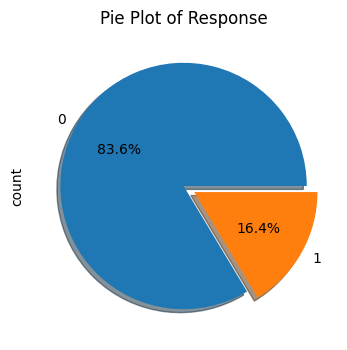

In [5]:
print(df.Response.value_counts())
df.Response.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", figsize = (4,4), shadow = True)
plt.title("Pie Plot of Response")
plt.show()


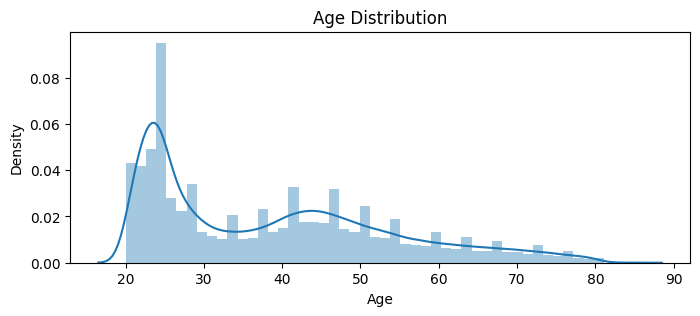

In [6]:
plt.figure(figsize = (8,3))
sns.distplot(df.Age).set_title('Age Distribution')
plt.show()

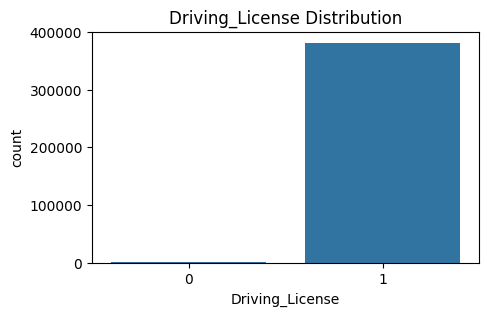

In [7]:
plt.figure(figsize = (5,3))
sns.countplot(data=df, x='Driving_License')
plt.title("Driving_License Distribution")
plt.show()

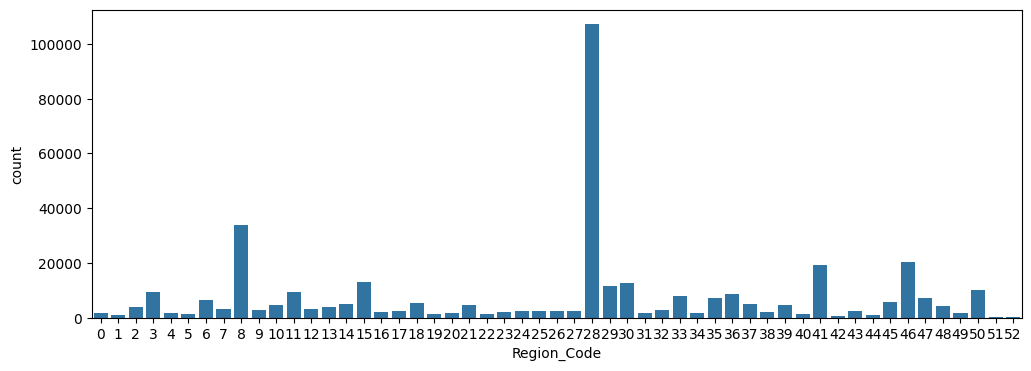

In [8]:
plt.figure(figsize = (12,4))
sns.countplot(x = df.Region_Code.astype(int))
plt.show()

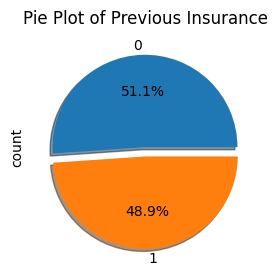

In [9]:
df.Previously_Insured.value_counts().plot.pie(explode = [0, 0.1], figsize = (3,3), autopct = "%1.1f%%", shadow = True)
plt.title("Pie Plot of Previous Insurance")
plt.show()

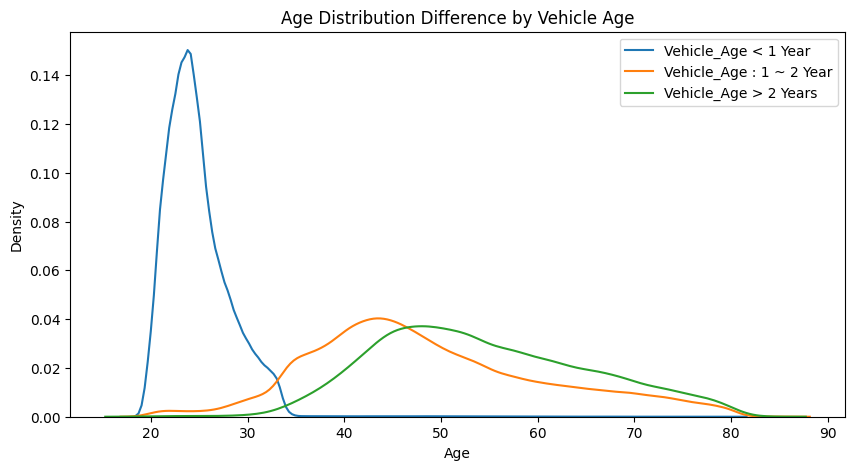

In [10]:
f, ax = plt.subplots(1, 1, figsize = (10,5))
sns.kdeplot(df[df.Vehicle_Age == "< 1 Year"]["Age"], bw_adjust = 1.7, ax = ax)
sns.kdeplot(df[df.Vehicle_Age == "1-2 Year"]["Age"], ax = ax)
sns.kdeplot(df[df.Vehicle_Age == "> 2 Years"]["Age"], ax = ax)
plt.legend(["Vehicle_Age < 1 Year", "Vehicle_Age : 1 ~ 2 Year", "Vehicle_Age > 2 Years"])
plt.title("Age Distribution Difference by Vehicle Age")
plt.show()

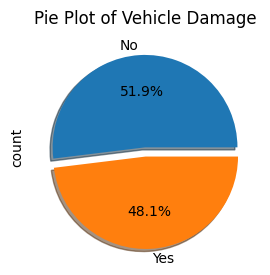

In [11]:
df.Vehicle_Damage.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", figsize = (3,3), shadow = True)
plt.title("Pie Plot of Vehicle Damage")
plt.show()

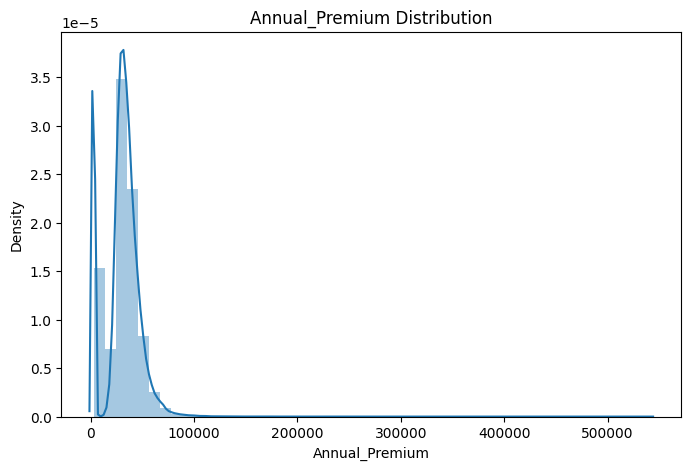

In [12]:
plt.figure(figsize = (8,5))
sns.distplot(df["Annual_Premium"])
plt.title("Annual_Premium Distribution")
plt.show()

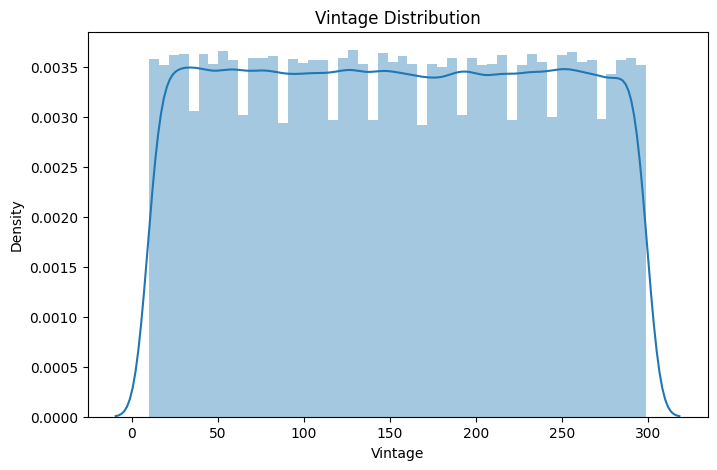

In [13]:
plt.figure(figsize = (8,5))
sns.distplot(df['Vintage'])
plt.title("Vintage Distribution")
plt.show()

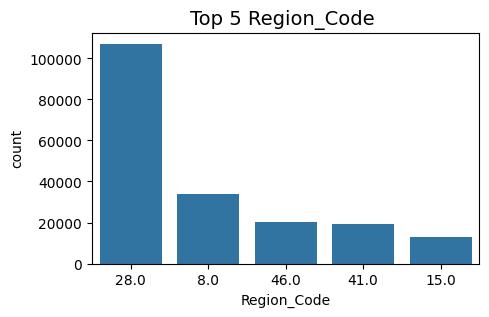

In [14]:
plt.figure(figsize=(5,3))
sns.countplot(x = 'Region_Code',data=df, order=df.Region_Code.value_counts().iloc[:5].index)
plt.title('Top 5 Region_Code ', fontsize=14)
plt.show()

In [15]:
df_num_col = df.select_dtypes(exclude=['object']).columns
df_num = df[df_num_col]

In [16]:
correlation = (pd.DataFrame(df_num.corr().Response))
correlation.sort_values(by='Response', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Response
Response,1.000000
id,0.166621
Age,0.133149
Annual_Premium,0.030777
Driving_License,0.013250
Region_Code,0.011289
Vintage,-0.001884
Policy_Sales_Channel,-0.184514
Previously_Insured,-0.431224


# Multivariate EDA

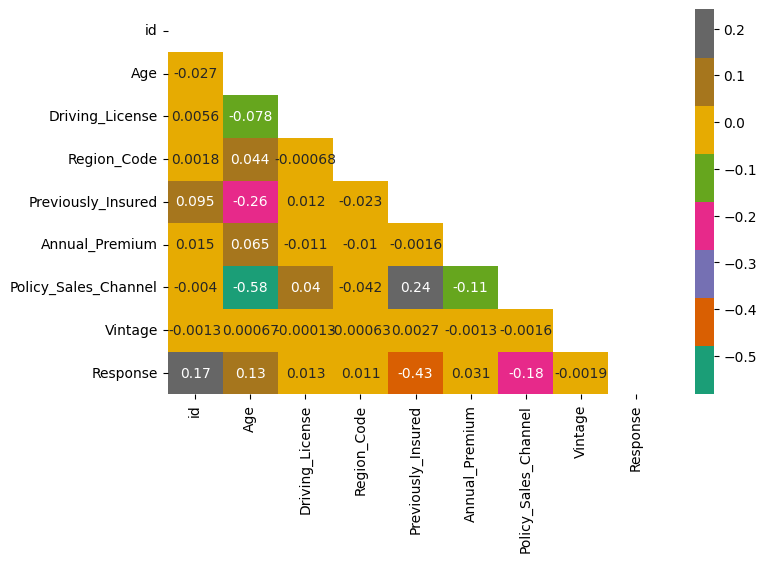

In [17]:
plt.figure(figsize=(8,5))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, cmap='Dark2');

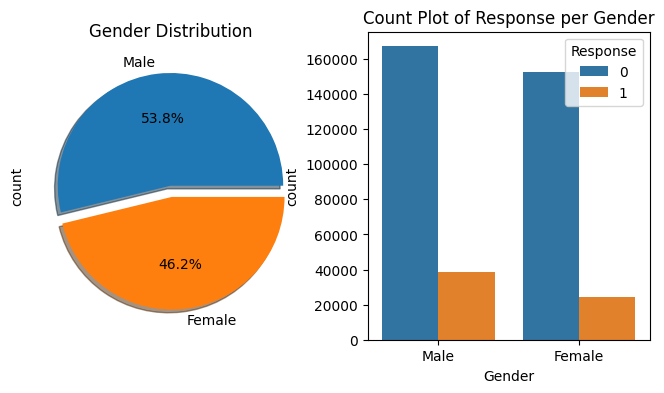

In [18]:
f, ax = plt.subplots(1, 2, figsize = (8,4))

df.Gender.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", shadow = True, ax = ax[0])
ax[0].set_title("Gender Distribution")

# Create a count plot for Response per Gender
sns.countplot(data=df, x='Gender', hue='Response', ax=ax[1])
ax[1].set_title("Count Plot of Response per Gender")

plt.show()

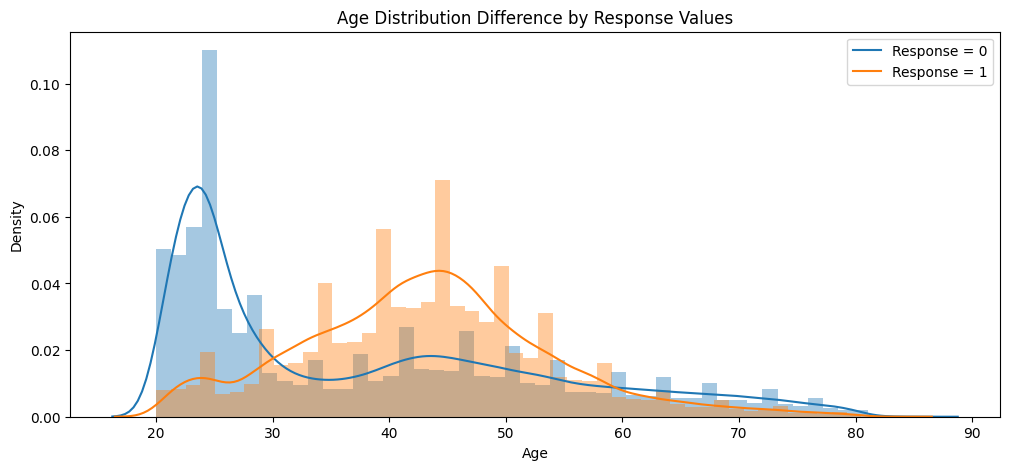

In [19]:
f, ax = plt.subplots(1, 1, figsize = (12,5))
sns.distplot(df[df.Response == 0]["Age"], ax = ax)
sns.distplot(df[df.Response == 1]["Age"], ax = ax)
plt.title("Age Distribution Difference by Response Values")
plt.legend(["Response = 0", "Response = 1"])
plt.show()

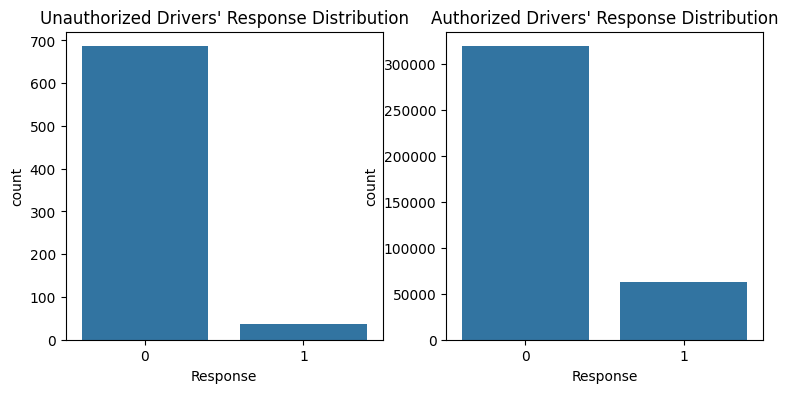

In [20]:
# Create a figure with two subplots side by side
f, ax = plt.subplots(1, 2, figsize=(9, 4))

# Plot a count plot for Unauthorized Drivers' Response Distribution
sns.countplot(data=df[df['Driving_License'] == 0].reset_index(), x='Response', ax=ax[0])
ax[0].set_title("Unauthorized Drivers' Response Distribution")

# Plot a count plot for Authorized Drivers' Response Distribution
sns.countplot(data=df[df['Driving_License'] == 1].reset_index(), x='Response', ax=ax[1])
ax[1].set_title("Authorized Drivers' Response Distribution")
plt.show()

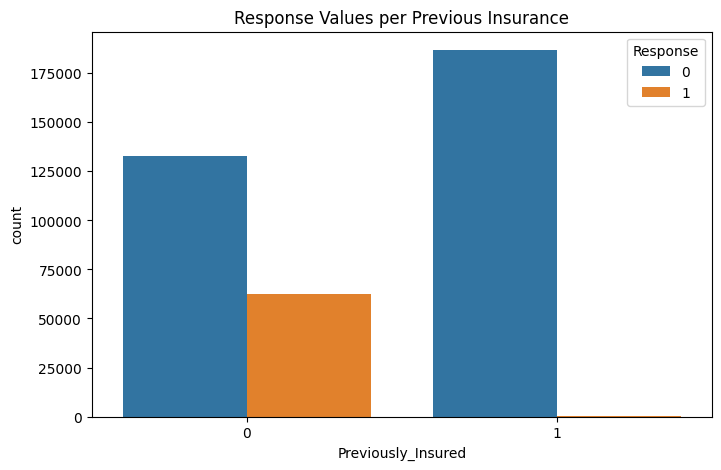

In [21]:
plt.figure(figsize = (8, 5))
sns.countplot(data=df, x="Previously_Insured", hue='Response')
plt.title("Response Values per Previous Insurance")

plt.show()

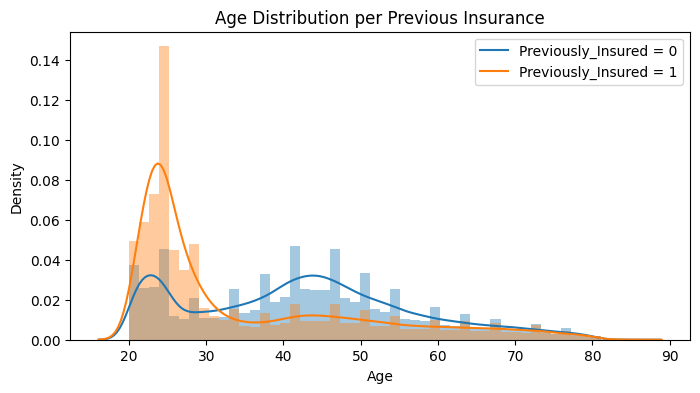

In [22]:
plt.figure(figsize = (8,4))
sns.distplot(df.loc[df.Previously_Insured == 0, "Age"])
sns.distplot(df.loc[df.Previously_Insured == 1, "Age"])
plt.title('Age Distribution per Previous Insurance')
plt.legend(["Previously_Insured = 0", "Previously_Insured = 1"])
plt.show()

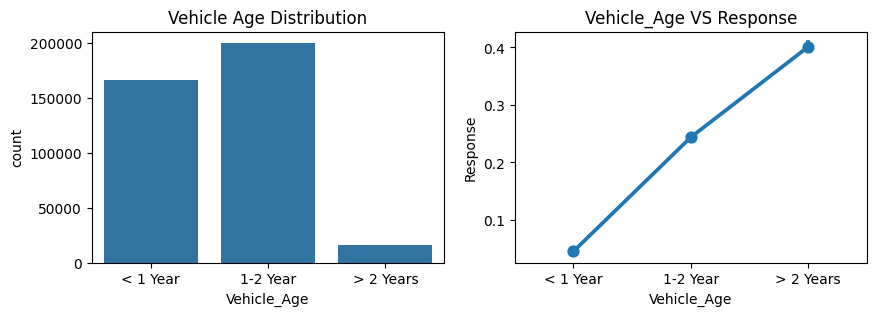

In [23]:
f, ax = plt.subplots(1, 2, figsize = (10,3))

sns.countplot(x = "Vehicle_Age", data = df, ax = ax[0])
ax[0].set_title("Vehicle Age Distribution")

sns.pointplot(x = 'Vehicle_Age', y = 'Response', data = df, ax = ax[1])
ax[1].set_title('Vehicle_Age VS Response')

plt.show()

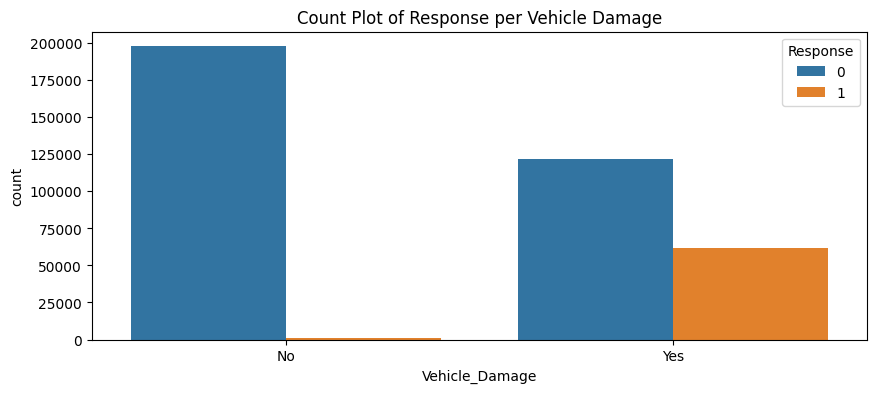

In [24]:
plt.figure(figsize = (10,4))
sns.countplot(x = "Vehicle_Damage", hue = "Response", data = df)
plt.title("Count Plot of Response per Vehicle Damage")
plt.show()

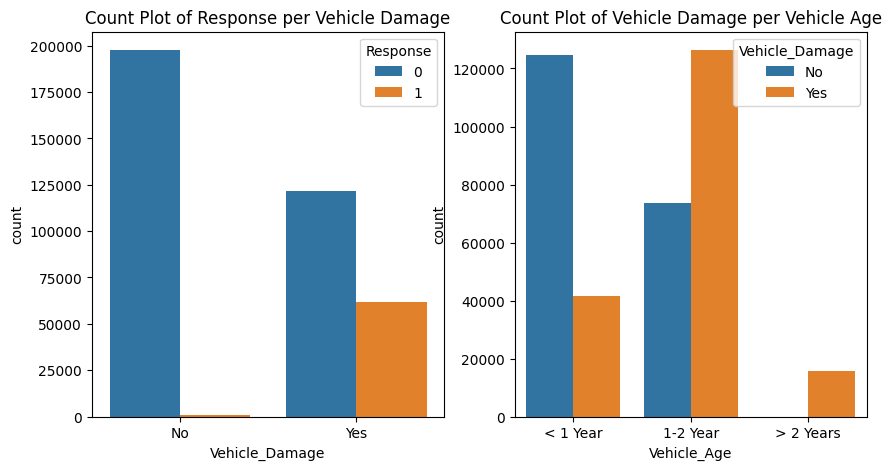

In [25]:
f, ax = plt.subplots(1, 2, figsize = (10,5))

sns.countplot(x = "Vehicle_Damage", hue = "Response", data = df, ax = ax[0])
ax[0].set_title("Count Plot of Response per Vehicle Damage")

sns.countplot(x = "Vehicle_Age", hue = "Vehicle_Damage", data = df, ax = ax[1])
ax[1].set_title("Count Plot of Vehicle Damage per Vehicle Age")

plt.show()

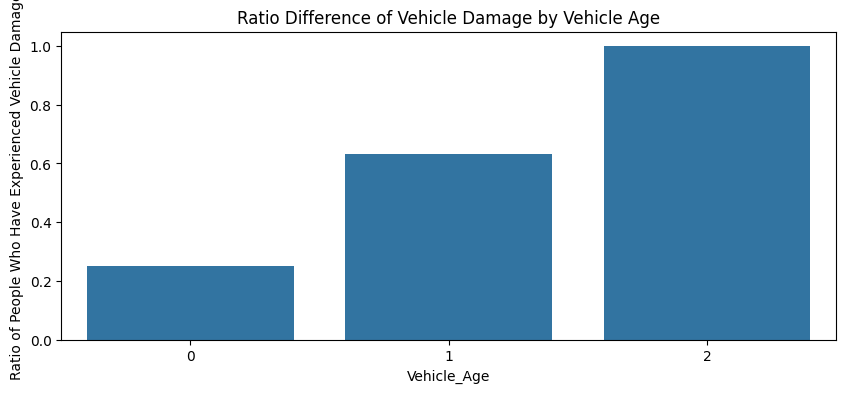

In [27]:
# Vechile_Damage, Vehicle_Age
vehicle = df.loc[:, ["Vehicle_Damage", "Vehicle_Age"]]


vehicle["Vehicle_Damage"] = vehicle["Vehicle_Damage"].map({"No": 0, "Yes": 1})
vehicle["Vehicle_Age"] = vehicle["Vehicle_Age"].map({"< 1 Year": 0, "1-2 Year": 1, "> 2 Years": 2})

plt.figure(figsize = (10,4))
sns.barplot(x = "Vehicle_Age", y = "Vehicle_Damage",
            data = vehicle.groupby("Vehicle_Age", as_index = False).mean().sort_values(by = "Vehicle_Damage", ascending = True))
plt.title("Ratio Difference of Vehicle Damage by Vehicle Age")
plt.ylabel("Ratio of People Who Have Experienced Vehicle Damage")

plt.show()

<Figure size 1000x400 with 0 Axes>

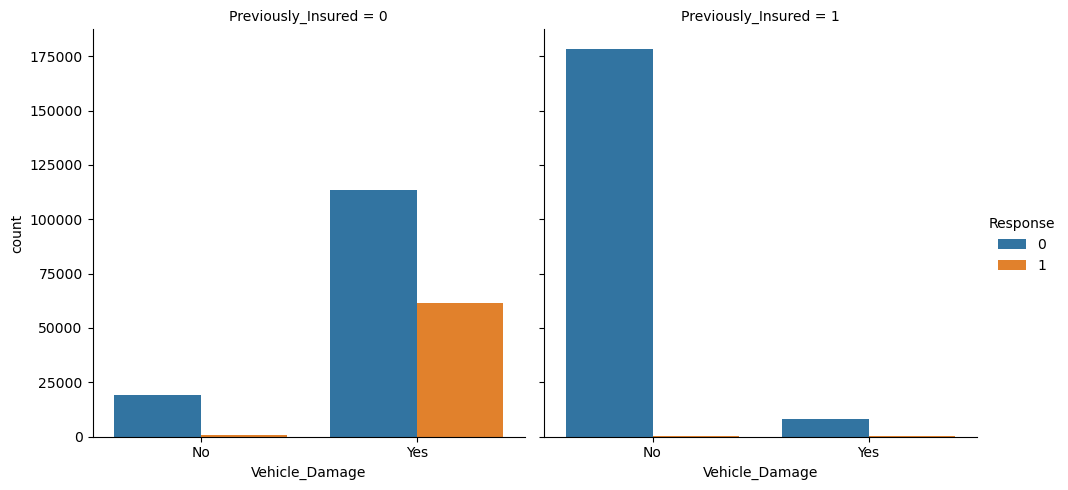

In [ ]:
plt.figure(figsize = (10,4))
sns.catplot(x = "Vehicle_Damage", col = "Previously_Insured", hue = "Response", data = df, kind = "count")
plt.show()

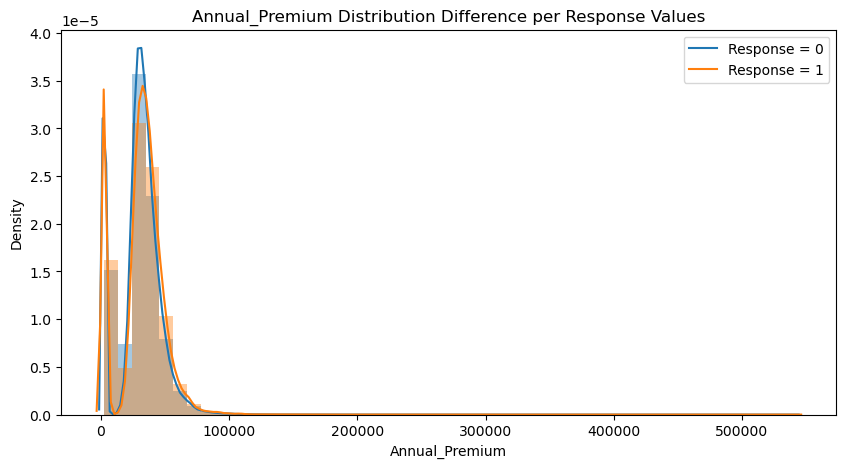

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (10,5))
sns.distplot(df[df.Response == 0]["Annual_Premium"], ax = ax)
sns.distplot(df[df.Response == 1]["Annual_Premium"], ax = ax)
plt.legend(["Response = 0", "Response = 1"])
plt.title("Annual_Premium Distribution Difference per Response Values")
plt.show()

In [ ]:
ap_2630up = df[df.Annual_Premium > 2630]

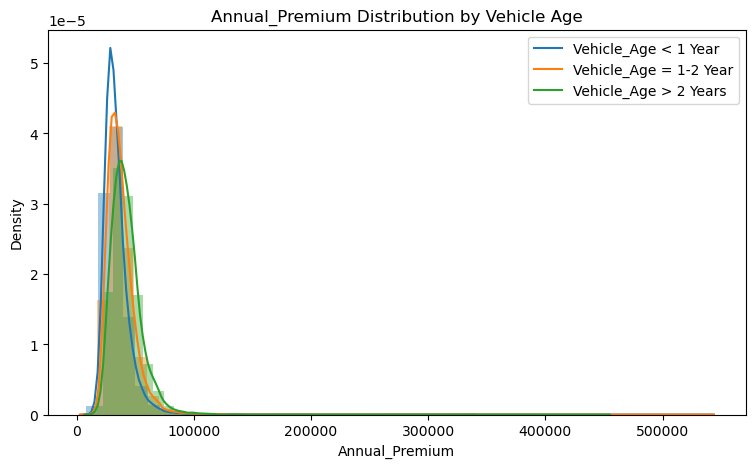

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.distplot(ap_2630up[ap_2630up.Vehicle_Age == "< 1 Year"]["Annual_Premium"], ax = ax)
sns.distplot(ap_2630up[ap_2630up.Vehicle_Age == "1-2 Year"]["Annual_Premium"], ax = ax)
sns.distplot(ap_2630up[ap_2630up.Vehicle_Age == "> 2 Years"]["Annual_Premium"], ax = ax)
plt.legend(["Vehicle_Age < 1 Year", "Vehicle_Age = 1-2 Year", "Vehicle_Age > 2 Years"])
plt.title("Annual_Premium Distribution by Vehicle Age")
plt.show()

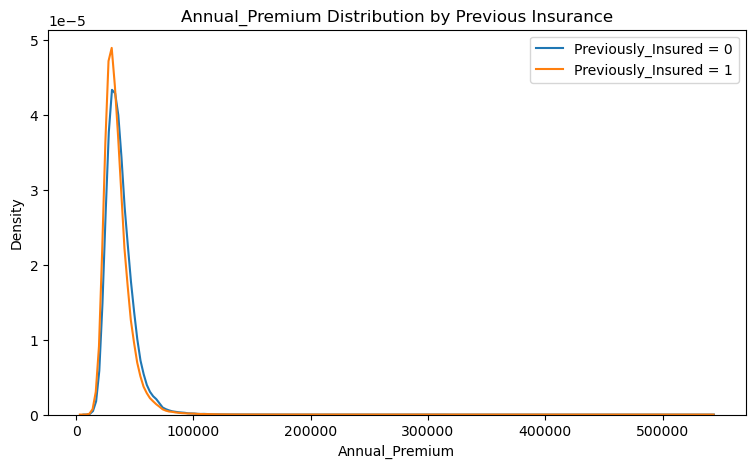

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(ap_2630up[ap_2630up.Previously_Insured == 0]["Annual_Premium"], ax = ax)
sns.kdeplot(ap_2630up[ap_2630up.Previously_Insured == 1]["Annual_Premium"], ax = ax)
plt.legend(["Previously_Insured = 0", "Previously_Insured = 1"])
plt.title("Annual_Premium Distribution by Previous Insurance")
plt.show()

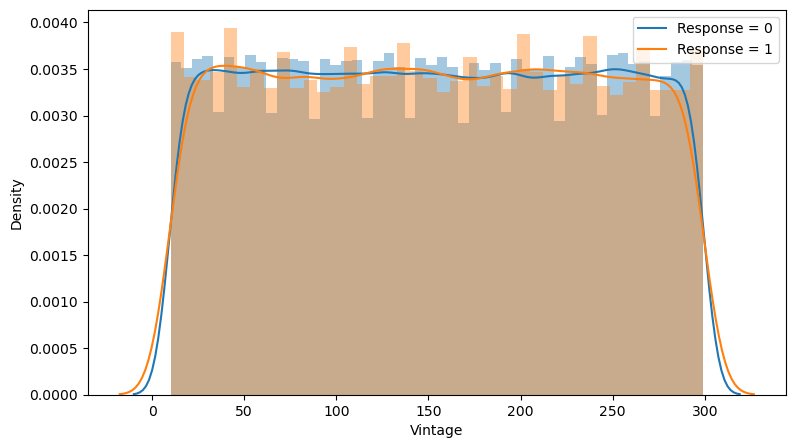

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.distplot(df[df.Response == 0]["Vintage"], ax = ax)
sns.distplot(df[df.Response == 1]["Vintage"], ax = ax)
plt.legend(["Response = 0", "Response = 1"])
plt.show()

## Outliers

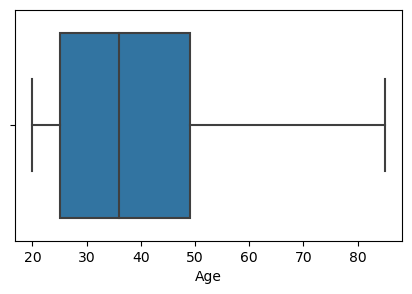

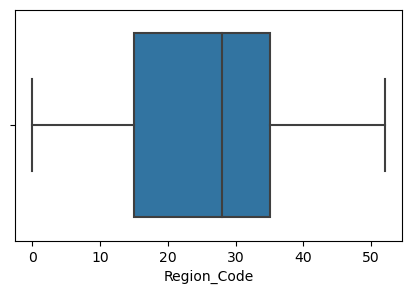

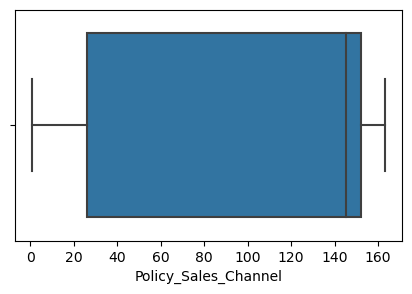

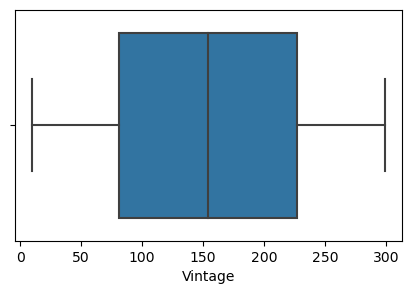

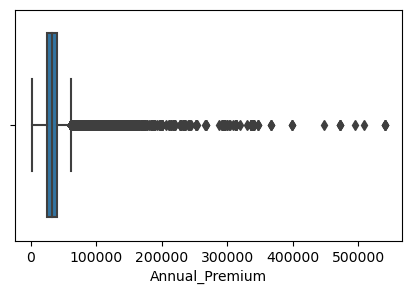

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['Age'])
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['Region_Code'])
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['Policy_Sales_Channel'])
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['Vintage'])
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['Annual_Premium'])
plt.show()

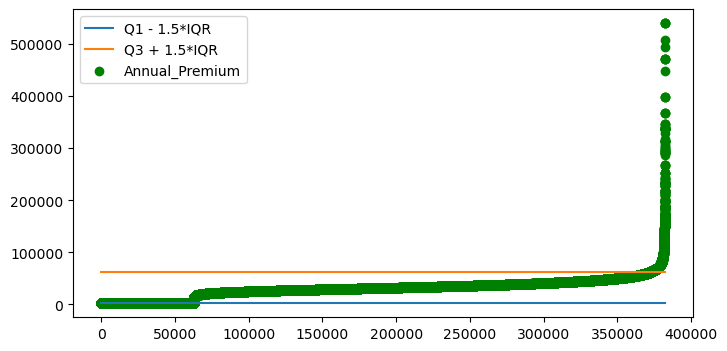

In [ ]:
q1 = np.quantile(df.Annual_Premium, 0.25)
q3 = np.quantile(df.Annual_Premium, 0.75)
iqr = q3 - q1

ap_Sorted = df.Annual_Premium.sort_values(ascending = True)
x = range(0, len(ap_Sorted))

plt.figure(figsize = (8,4))
plt.plot([0, len(ap_Sorted)], [q1 - 1.5*iqr, q1 - 1.5*iqr])
plt.plot([0, len(ap_Sorted)], [q3 + 1.5*iqr, q3 + 1.5*iqr])
plt.scatter(x, ap_Sorted,color="green")
plt.legend(["Q1 - 1.5*IQR", "Q3 + 1.5*IQR", "Annual_Premium"])
plt.show()

In [ ]:
# Finding the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Counting outliers
outliers_count = df[(df['Annual_Premium'] < lower_bound) | (df['Annual_Premium'] > upper_bound)]['Annual_Premium'].count()

# Calculating the percentage of outliers
total_data_points = len(df)
outliers_percentage = (outliers_count / total_data_points) * 100

print("Number of outliers:", outliers_count)
print("Percentage of outliers:", outliers_percentage, "%")

outlier = df[(df.Annual_Premium <= q1 - 1.5*iqr) | (df.Annual_Premium >= q3 + 1.5*iqr)]
new_df = df[(df.Annual_Premium > q1 - 1.5*iqr) & (df.Annual_Premium < q3 + 1.5*iqr)]

# 2*2 Spreadsheet for Outliers and Response Value
conclusion = pd.DataFrame({
    "Normal_Data" : [len(new_df[new_df.Response == 0]), len(new_df[new_df.Response == 1])],
    "Outliers" : [len(outlier[outlier.Response == 0]), len(outlier[outlier.Response == 1])]},
    index = ["Response = 0", "Response = 1"])
conclusion

Number of outliers: 10407
Percentage of outliers: 2.723247695955034 %


,Normal_Data,Outliers
Response = 0,311222,8331
Response = 1,60525,2076


In [ ]:
new_df.shape

(371747, 11)

0    319553
1     62601
Name: Response, dtype: int64


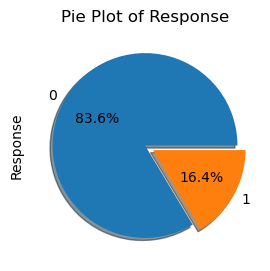

0    311222
1     60525
Name: Response, dtype: int64


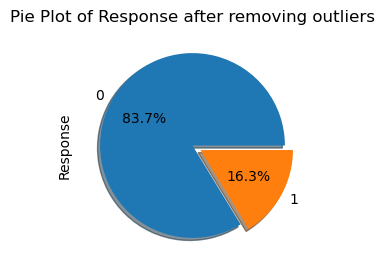

In [ ]:
print(df.Response.value_counts())

df.Response.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", figsize = (4,3), shadow = True)
plt.title("Pie Plot of Response")
plt.show()

#Imbalanced Target Data

print(new_df.Response.value_counts())

new_df.Response.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", figsize = (4,3), shadow = True)
plt.title("Pie Plot of Response after removing outliers")
plt.show()

#Imbalanced Target Data

In [ ]:
X = new_df.drop(["Response"],axis=1)
y = new_df["Response"]

In [ ]:
X_new = pd.get_dummies(X,drop_first=True)
X_new.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,22,1,7.0,1,2630.0,152.0,16,1,1,0,0
1,42,1,28.0,0,43327.0,26.0,135,1,0,0,1
2,66,1,33.0,0,35841.0,124.0,253,0,0,0,1
3,22,1,33.0,0,27645.0,152.0,69,0,1,0,0
4,28,1,46.0,1,29023.0,152.0,211,1,1,0,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_new,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((260222, 11), (111525, 11))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create the MinMaxScaler object and fit-transform the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

cols = x_train.columns
X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)


In [ ]:
y_train.shape,y_train.value_counts(),217864/(217864+42358),42358/(217864+42358)

((260222,),
 0    217864
 1     42358
 Name: Response, dtype: int64,
 0.8372236013865084,
 0.16277639861349155)

In [ ]:
y_test.shape,y_test.value_counts(),93358/(93358+18167),18167/(93358+18167)

((111525,),
 0    93358
 1    18167
 Name: Response, dtype: int64,
 0.8371037883882537,
 0.16289621161174625)

## Imbalance Data Models:

### 1) Decision Tree:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     93358
           1       0.43      0.44      0.43     18167

    accuracy                           0.81    111525
   macro avg       0.66      0.66      0.66    111525
weighted avg       0.82      0.81      0.81    111525



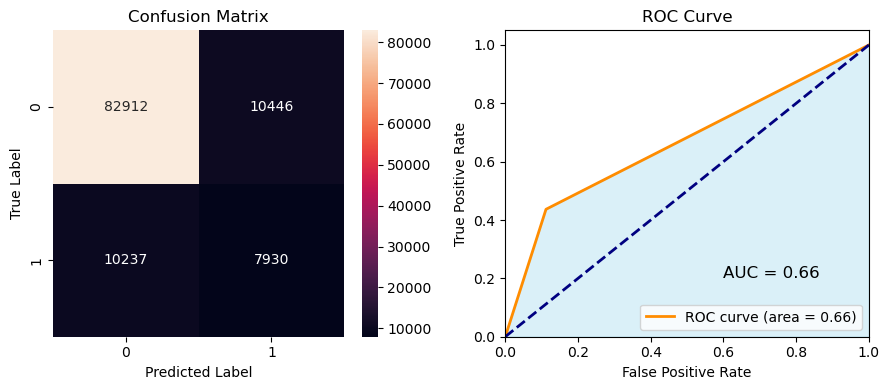

In [ ]:
# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))

# Calculate the predicted probabilities for positive class
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


## 2) Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     93358
           1       0.48      0.13      0.20     18167

    accuracy                           0.84    111525
   macro avg       0.67      0.55      0.55    111525
weighted avg       0.79      0.84      0.79    111525



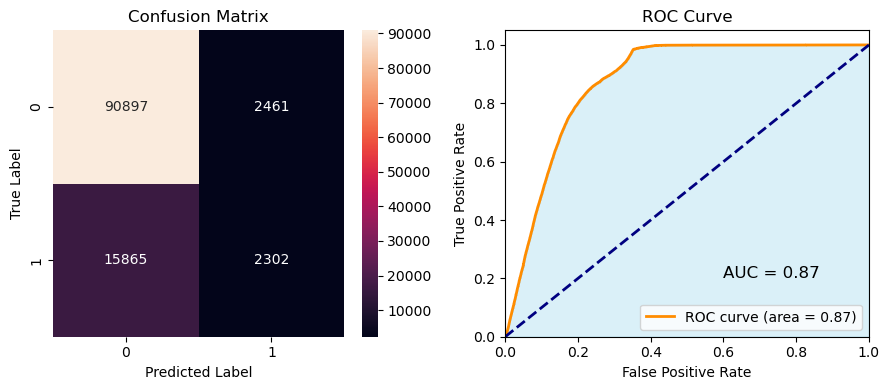

In [ ]:
lr_model_1 = LogisticRegression()
lr_model_1.fit(X_train, y_train)
y_pred_lr_1 = lr_model_1.predict(X_test)
print(classification_report(y_test, y_pred_lr_1))

# Calculate the predicted probabilities for positive class
y_pred_prob = lr_model_1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr_1), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

## 3) KNN

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     93358
           1       0.47      0.40      0.43     18167

    accuracy                           0.83    111525
   macro avg       0.68      0.66      0.67    111525
weighted avg       0.82      0.83      0.82    111525



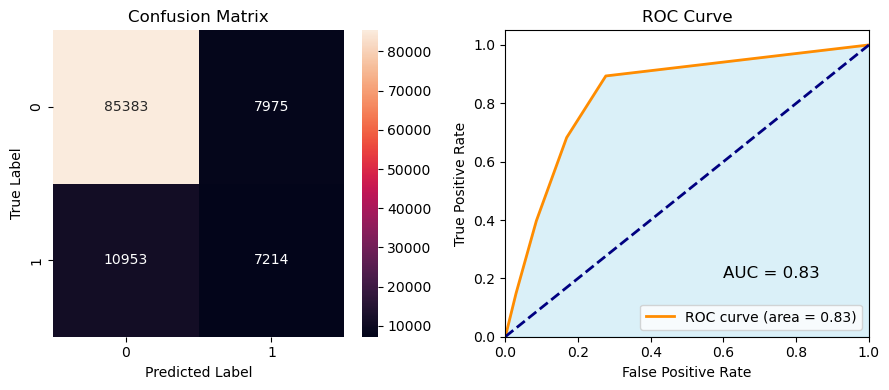

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_train, y_train)
y_pred_knn = knn_1.predict(X_test)
print(classification_report(y_test, y_pred_knn))

# Calculate the predicted probabilities for positive class
y_pred_prob = knn_1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

## 4) Random Forest

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     93358
           1       0.51      0.39      0.44     18167

    accuracy                           0.84    111525
   macro avg       0.70      0.66      0.67    111525
weighted avg       0.83      0.84      0.83    111525



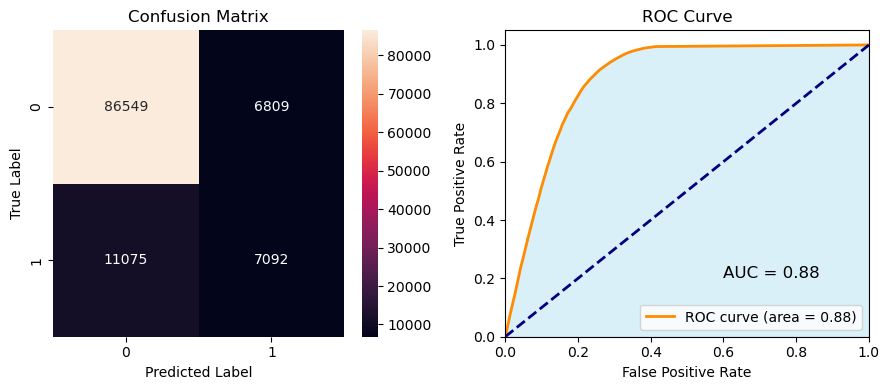

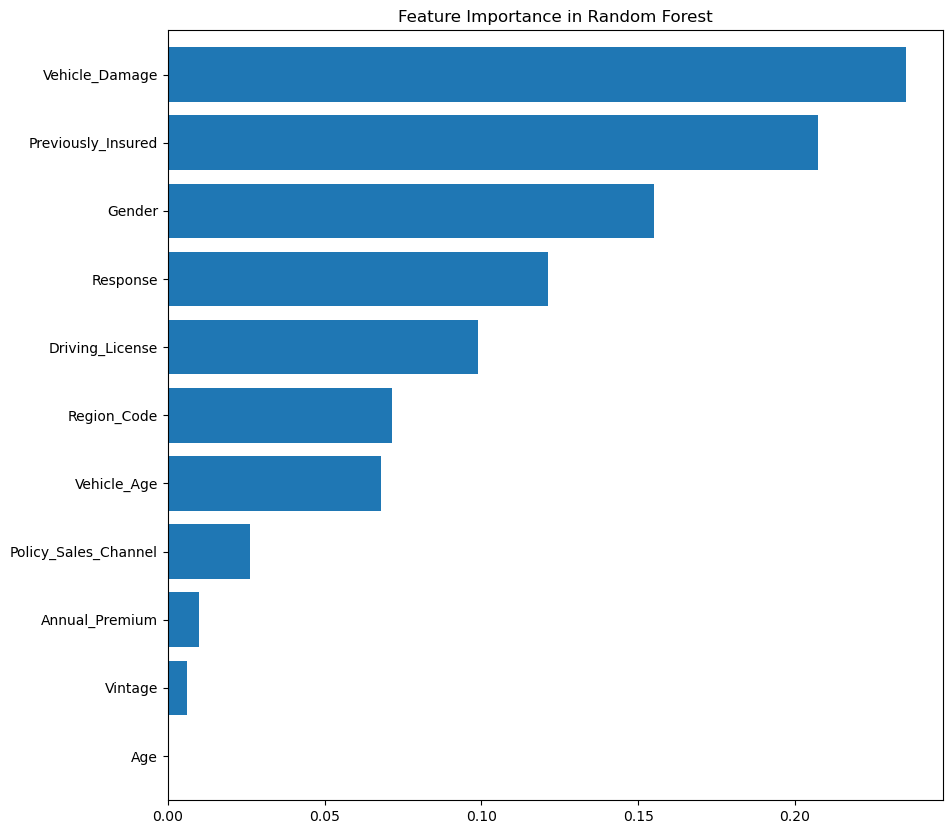

In [ ]:
rf_model_1 = RandomForestClassifier()
rf_model_1.fit(X_train, y_train)
y_pred_rf_1 = rf_model_1.predict(X_test)
print(classification_report(y_test, y_pred_rf_1))
# Calculate the predicted probabilities for positive class
y_pred_prob = rf_model_1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf_1), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

f, ax = plt.subplots(1, 1, figsize = (10,10))
pd.Series(rf_model_1.feature_importances_,new_df.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importance in Random Forest')
plt.show()

## Balance model:

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Count the number of instances in each class in the training set
class_counts_train = dict(Counter(y_train))

# Print the class distribution in the training set before resampling
print("Class distribution in the training set before resampling:", class_counts_train)

# Initialize the RandomOverSampler and RandomUnderSampler objects
oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Perform oversampling using RandomOverSampler on the training set
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Perform undersampling using RandomUnderSampler on the training set
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Count the number of instances in each class after resampling in the training set
oversampled_class_counts_train = dict(Counter(y_train_oversampled))
undersampled_class_counts_train = dict(Counter(y_train_undersampled))

# Print the class distribution in the training set after resampling
print("Class distribution in the training set after oversampling:", oversampled_class_counts_train)
print("Class distribution in the training set after undersampling:", undersampled_class_counts_train)

Class distribution in the training set before resampling: {1: 42358, 0: 217864}
Class distribution in the training set after oversampling: {1: 217864, 0: 217864}
Class distribution in the training set after undersampling: {0: 42358, 1: 42358}


# 1) Under Sampling

## 1) Decision Tree

              precision    recall  f1-score   support

           0       0.94      0.77      0.85     93358
           1       0.39      0.75      0.51     18167

    accuracy                           0.77    111525
   macro avg       0.66      0.76      0.68    111525
weighted avg       0.85      0.77      0.79    111525



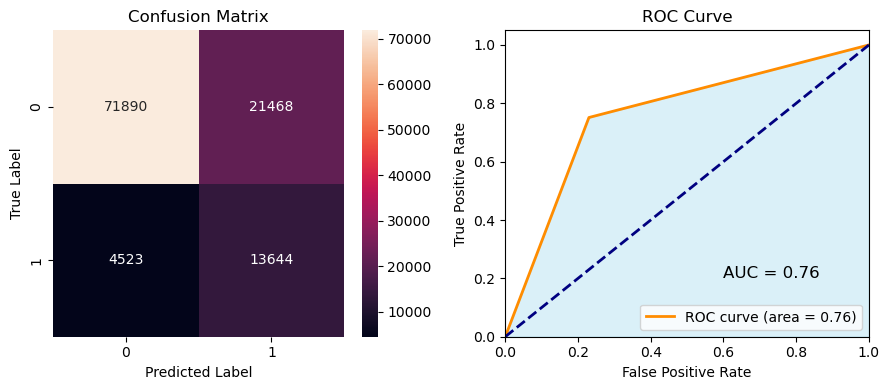

In [ ]:
# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_undersampled, y_train_undersampled)
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))

# Calculate the predicted probabilities for positive class
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


## 2) Logistics

              precision    recall  f1-score   support

           0       0.99      0.66      0.79     93358
           1       0.35      0.96      0.52     18167

    accuracy                           0.71    111525
   macro avg       0.67      0.81      0.65    111525
weighted avg       0.88      0.71      0.75    111525



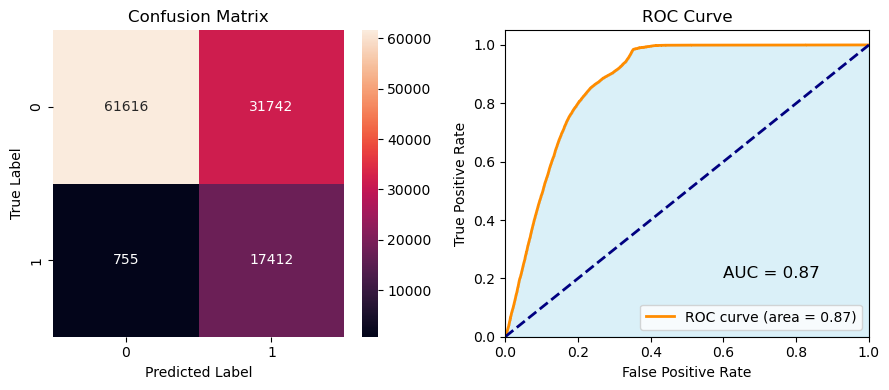

In [ ]:
lr_model_1 = LogisticRegression()
lr_model_1.fit(X_train_undersampled, y_train_undersampled)
y_pred_lr_1 = lr_model_1.predict(X_test)
print(classification_report(y_test, y_pred_lr_1))

# Calculate the predicted probabilities for positive class
y_pred_prob = lr_model_1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr_1), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

## 3) KNN

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     93358
           1       0.40      0.88      0.55     18167

    accuracy                           0.77    111525
   macro avg       0.69      0.81      0.70    111525
weighted avg       0.88      0.77      0.80    111525



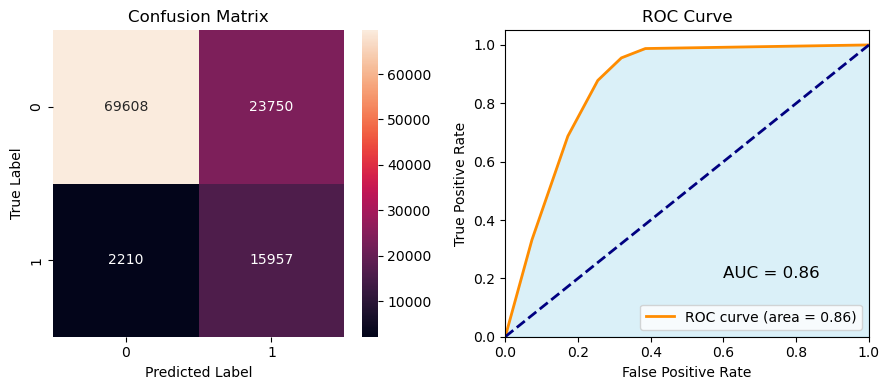

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_train_undersampled, y_train_undersampled)
y_pred_knn = knn_1.predict(X_test)
print(classification_report(y_test, y_pred_knn))

# Calculate the predicted probabilities for positive class
y_pred_prob = knn_1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

## 4) Random Forest

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     93358
           1       0.42      0.89      0.57     18167

    accuracy                           0.78    111525
   macro avg       0.70      0.83      0.71    111525
weighted avg       0.88      0.78      0.81    111525



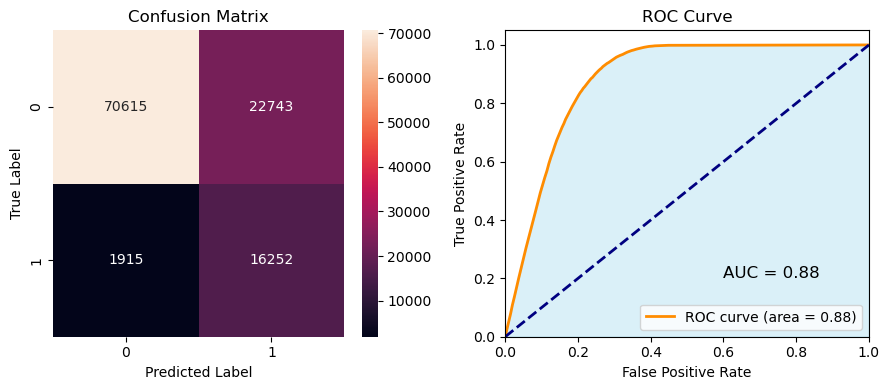

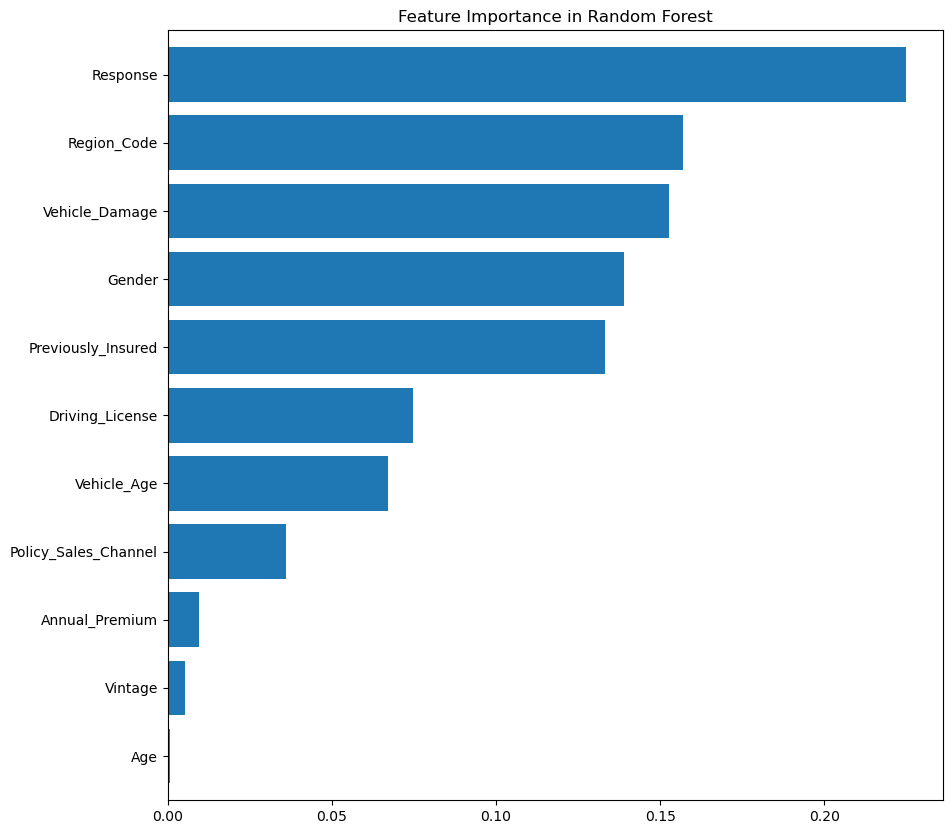

In [ ]:
rf_model_1 = RandomForestClassifier()
rf_model_1.fit(X_train_undersampled, y_train_undersampled)
y_pred_rf_1 = rf_model_1.predict(X_test)
print(classification_report(y_test, y_pred_rf_1))
# Calculate the predicted probabilities for positive class
y_pred_prob = rf_model_1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf_1), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

f, ax = plt.subplots(1, 1, figsize = (10,10))
pd.Series(rf_model_1.feature_importances_,new_df.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importance in Random Forest')
plt.show()

# 2) Over Sampling

## 1) Decision Tree

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     93358
           1       0.43      0.42      0.43     18167

    accuracy                           0.82    111525
   macro avg       0.66      0.66      0.66    111525
weighted avg       0.81      0.82      0.81    111525



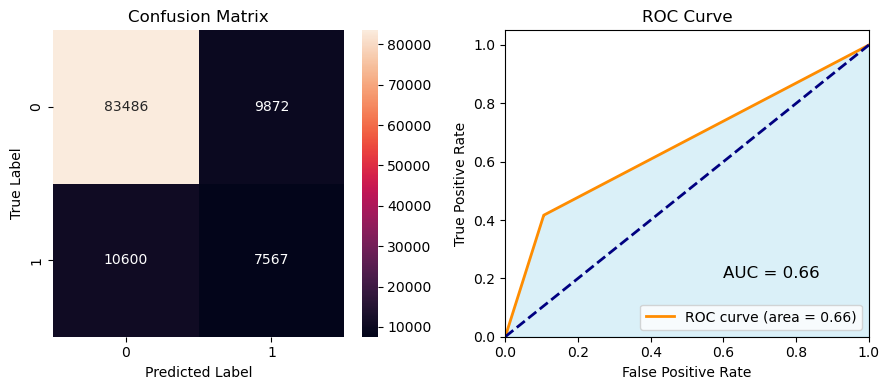

In [ ]:
# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_oversampled, y_train_oversampled)
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))

# Calculate the predicted probabilities for positive class
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


## 2) Logistic

              precision    recall  f1-score   support

           0       0.99      0.66      0.79     93358
           1       0.35      0.96      0.52     18167

    accuracy                           0.71    111525
   macro avg       0.67      0.81      0.66    111525
weighted avg       0.88      0.71      0.75    111525



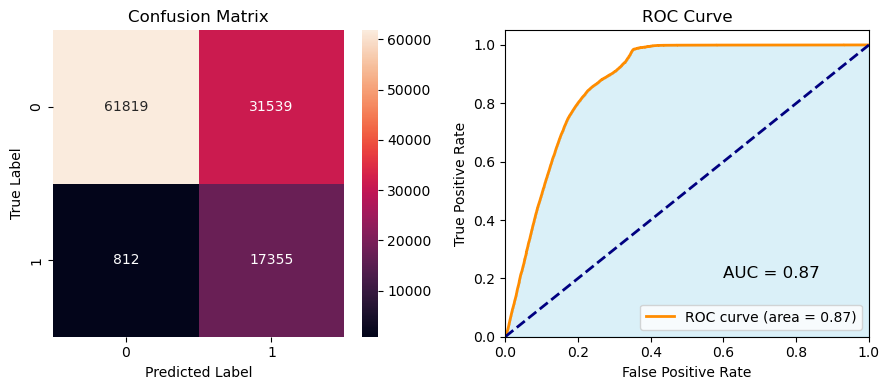

In [ ]:
lr_model_1 = LogisticRegression()
lr_model_1.fit(X_train_oversampled, y_train_oversampled)
y_pred_lr_1 = lr_model_1.predict(X_test)
print(classification_report(y_test, y_pred_lr_1))

# Calculate the predicted probabilities for positive class
y_pred_prob = lr_model_1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr_1), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

## 3) KNN

              precision    recall  f1-score   support

           0       0.94      0.78      0.86     93358
           1       0.41      0.76      0.53     18167

    accuracy                           0.78    111525
   macro avg       0.68      0.77      0.69    111525
weighted avg       0.86      0.78      0.80    111525



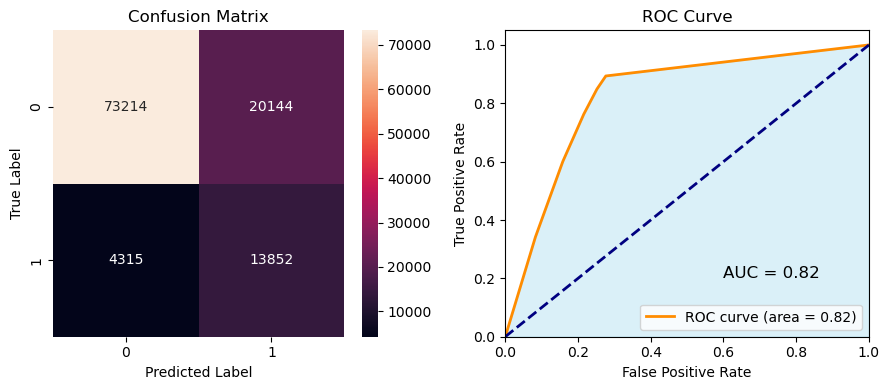

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_train_oversampled, y_train_oversampled)
y_pred_knn = knn_1.predict(X_test)
print(classification_report(y_test, y_pred_knn))

# Calculate the predicted probabilities for positive class
y_pred_prob = knn_1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

## 4) Random Forest

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     93358
           1       0.49      0.56      0.52     18167

    accuracy                           0.83    111525
   macro avg       0.70      0.72      0.71    111525
weighted avg       0.84      0.83      0.84    111525



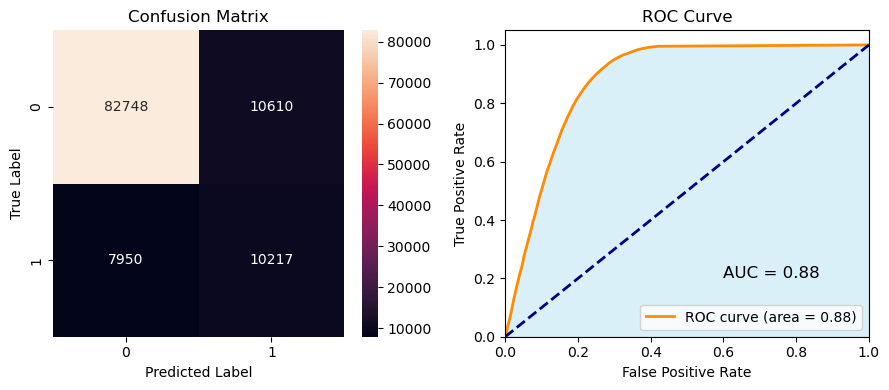

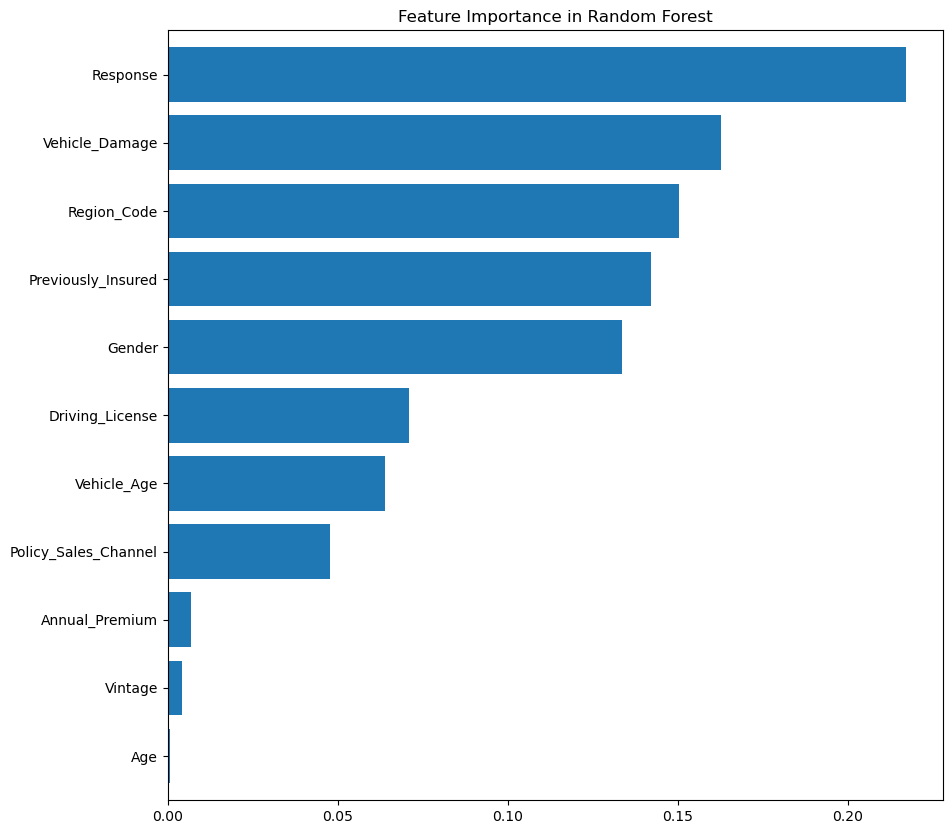

In [ ]:
rf_model_1 = RandomForestClassifier()
rf_model_1.fit(X_train_oversampled, y_train_oversampled)
y_pred_rf_1 = rf_model_1.predict(X_test)
print(classification_report(y_test, y_pred_rf_1))
# Calculate the predicted probabilities for positive class
y_pred_prob = rf_model_1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf_1), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

f, ax = plt.subplots(1, 1, figsize = (10,10))
pd.Series(rf_model_1.feature_importances_,new_df.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importance in Random Forest')
plt.show()

# 3) Over Sampling and Under Sampling

In [ ]:
desired_minority_ratio = 0.4
desired_majority_ratio = 0.6

In [ ]:
# Check the class distribution before resampling
print("Before resampling:", Counter(y_train))

# Apply SMOTE to oversample the minority class
over_sampler = RandomOverSampler(sampling_strategy=desired_minority_ratio, random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

# Apply RandomUnderSampler to undersample the majority class
under_sampler = RandomUnderSampler(sampling_strategy=desired_majority_ratio, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)

# Check the class distribution after resampling
print("After resampling:", Counter(y_resampled))


Before resampling: Counter({0: 217864, 1: 42358})
After resampling: Counter({0: 145241, 1: 87145})


## 1) Decision Tree

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     93358
           1       0.42      0.52      0.46     18167

    accuracy                           0.81    111525
   macro avg       0.66      0.69      0.67    111525
weighted avg       0.82      0.81      0.81    111525



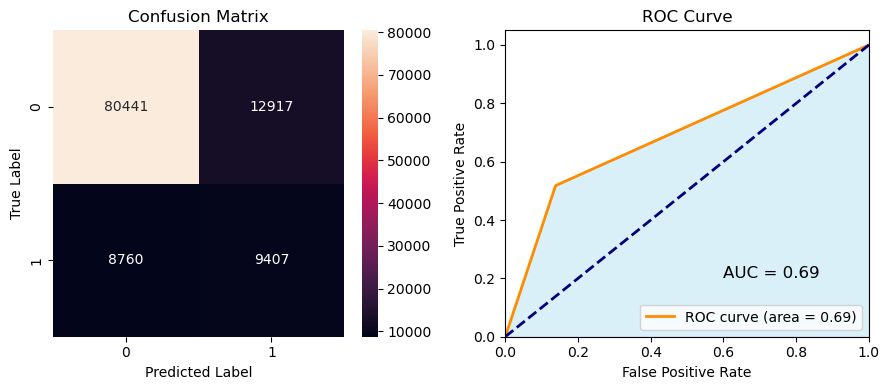

In [ ]:
# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_resampled, y_resampled)
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))

# Calculate the predicted probabilities for positive class
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


## 2) Logistic

              precision    recall  f1-score   support

           0       0.96      0.77      0.86     93358
           1       0.42      0.84      0.56     18167

    accuracy                           0.78    111525
   macro avg       0.69      0.81      0.71    111525
weighted avg       0.87      0.78      0.81    111525



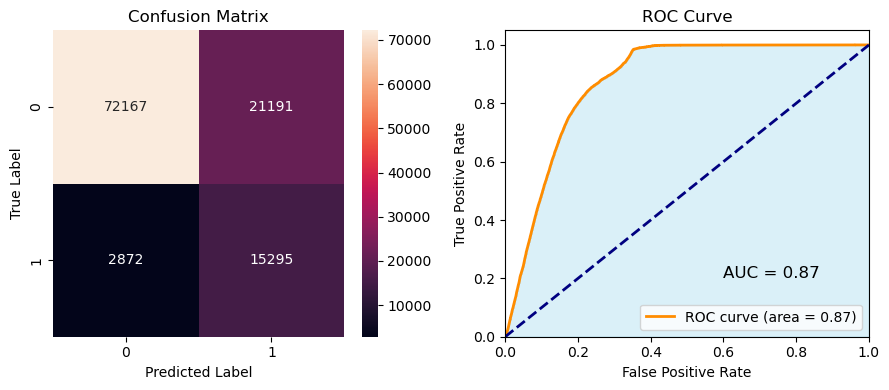

In [ ]:
lr_model_1 = LogisticRegression()
lr_model_1.fit(X_resampled, y_resampled)
y_pred_lr_1 = lr_model_1.predict(X_test)
print(classification_report(y_test, y_pred_lr_1))

# Calculate the predicted probabilities for positive class
y_pred_prob = lr_model_1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr_1), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

## 3) KNN

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     93358
           1       0.42      0.72      0.53     18167

    accuracy                           0.79    111525
   macro avg       0.68      0.76      0.70    111525
weighted avg       0.85      0.79      0.81    111525



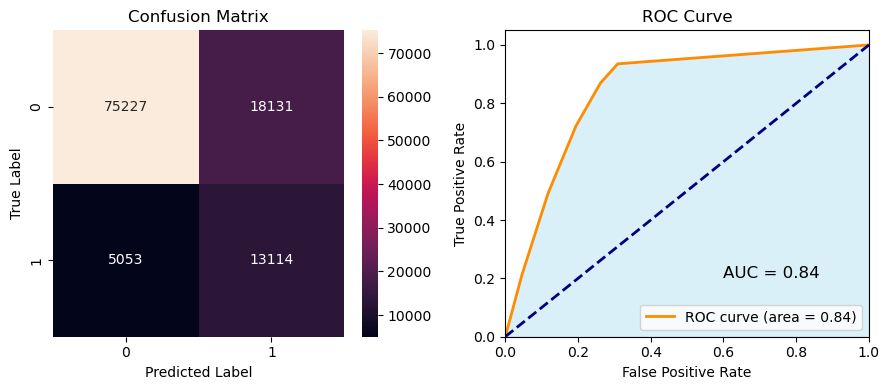

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_resampled, y_resampled)
y_pred_knn = knn_1.predict(X_test)
print(classification_report(y_test, y_pred_knn))

# Calculate the predicted probabilities for positive class
y_pred_prob = knn_1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

## 4) Random Forest

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     93358
           1       0.48      0.67      0.56     18167

    accuracy                           0.83    111525
   macro avg       0.70      0.76      0.73    111525
weighted avg       0.86      0.83      0.84    111525



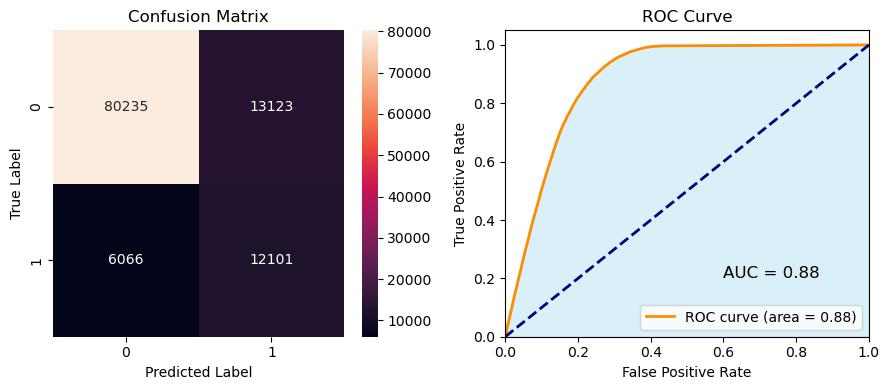

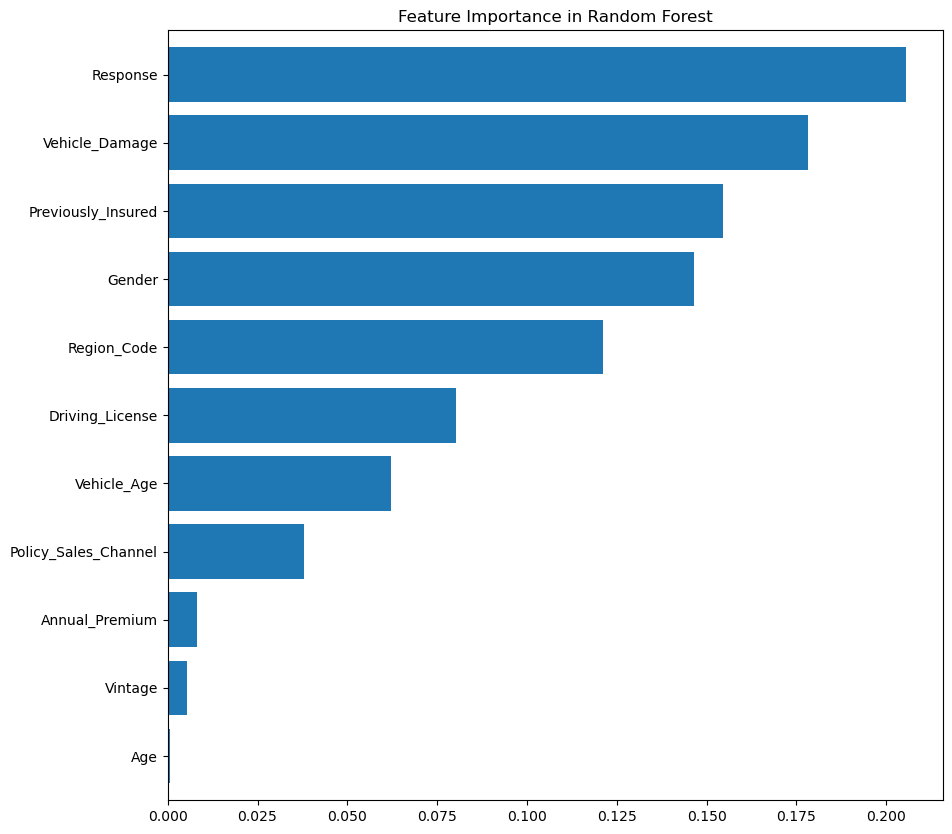

In [ ]:
rf_model_1 = RandomForestClassifier()
rf_model_1.fit(X_resampled, y_resampled)
y_pred_rf_1 = rf_model_1.predict(X_test)
print(classification_report(y_test, y_pred_rf_1))

# Calculate the predicted probabilities for positive class
y_pred_prob = rf_model_1.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create subplots side by side
plt.figure(figsize=(9, 4))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf_1), annot=True, fmt='2.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')

# ROC curve with shaded area under the curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

f, ax = plt.subplots(1, 1, figsize = (10,10))
pd.Series(rf_model_1.feature_importances_,new_df.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importance in Random Forest')
plt.show()

## SMOTEENN , SMOTETomek

In [ ]:
#UnderOverSampling
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
#Evaluation
from sklearn import metrics

### 1) SMOTEENN with Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from imblearn.combine import SMOTEENN

a = [0.3,0.4,0.5,0.6,0.66,0.7]
accuracy = []
recall = []
precision = []
f1_scores = []

for i in a:
    smoteenn = SMOTEENN(sampling_strategy=i)
    train_input_res, train_target_res = smoteenn.fit_resample(X_train, y_train)
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(train_input_res, train_target_res)

    predictions = rf.predict(X_test)
    accuracy.append(accuracy_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    f1_scores.append(f1_score(y_test, predictions))

smoteenn_score_dataframe = pd.DataFrame({
    'accuracy': accuracy,
    'recall': recall,
    'precision': precision,
    'f1_score': f1_scores
}, index=a)

styled_dataframe = smoteenn_score_dataframe.style.background_gradient(cmap='Wistia')
styled_dataframe


,accuracy,recall,precision,f1_score
0.300000,0.836727,0.682061,0.499154,0.576446
0.400000,0.829662,0.768591,0.485568,0.595145
0.500000,0.823215,0.805141,0.474856,0.597386
0.600000,0.816561,0.827324,0.464592,0.595035
0.660000,0.814347,0.834370,0.461375,0.594187
0.700000,0.811997,0.842682,0.458106,0.593545


### 2) SMOTEENN with KNN

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

a = [0.3,0.4,0.5,0.6,0.66,0.7]
accuracy = []
recall = []
precision = []
f1_scores = []

for i in a:
    smoteenn = SMOTEENN(sampling_strategy=i)
    train_input_res, train_target_res = smoteenn.fit_resample(X_train, y_train)
    knn = KNeighborsClassifier(n_neighbors=5)  # Adjust the n_neighbors value
    knn.fit(train_input_res, train_target_res)

    predictions = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    f1_scores.append(f1_score(y_test, predictions))

smoteenn_score_dataframe = pd.DataFrame({
    'accuracy': accuracy,
    'recall': recall,
    'precision': precision,
    'f1_score': f1_scores
}, index=a)

styled_dataframe = smoteenn_score_dataframe.style.background_gradient(cmap='Wistia')
styled_dataframe


,accuracy,recall,precision,f1_score
0.300000,0.820498,0.678043,0.465041,0.551696
0.400000,0.806770,0.773270,0.446266,0.565927
0.500000,0.796629,0.819453,0.434175,0.567610
0.600000,0.786595,0.847581,0.422685,0.564071
0.660000,0.783340,0.857104,0.419274,0.563096
0.700000,0.779700,0.865635,0.415438,0.561432


### 3) SMOTETomek with Random Forest

In [ ]:
a = [0.3,0.4,0.5,0.6,0.66,0.7]   #Response value ratio : 0.3 ~ 0.5
accuracy=[]
recall=[]
precision=[]
#f1_score=[]

for i in a:
    smo_tom=SMOTETomek(sampling_strategy=i)
    train_input_res, train_target_res = smoteenn.fit_resample(X_train, y_train)
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(train_input_res, train_target_res)

    predictions = rf.predict(X_test)
    accuracy.append(accuracy_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    #f1_scores.append(f1_score(y_test, predictions, average='binary'))  # Added 'average' parameter

smotetomek_score_dataframe = pd.DataFrame({
    'accuracy': accuracy,
    'recall': recall,
    'precision': precision,
#    'f1_score': f1_scores
}, index=a)

styled_dataframe = smotetomek_score_dataframe.style.background_gradient(cmap='Wistia')
styled_dataframe


,accuracy,recall,precision
0.300000,0.812015,0.844443,0.458214
0.400000,0.812419,0.842296,0.458734
0.500000,0.811199,0.844113,0.456956
0.600000,0.812625,0.845984,0.459215
0.660000,0.810572,0.843122,0.455958
0.700000,0.812374,0.842847,0.458690


### 4) SMOTETomek with KNN

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

a = [0.3,0.4,0.5,0.6,0.66,0.7]
accuracy = []
recall = []
precision = []
#f1_scores = []

for i in a:
    smo_tom = SMOTETomek(sampling_strategy=i)
    train_input_res, train_target_res = smo_tom.fit_resample(X_train, y_train)  # Changed variable name here
    knn = KNeighborsClassifier(n_neighbors=5)  # Adjust the n_neighbors value
    knn.fit(train_input_res, train_target_res)

    predictions = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    #f1_scores.append(f1_score(y_test, predictions, average='binary'))  # Added 'average' parameter

smotetomek_score_dataframe = pd.DataFrame({
    'accuracy': accuracy,
    'recall': recall,
    'precision': precision,
#    'f1_score': f1_scores
}, index=a)

styled_dataframe = smotetomek_score_dataframe.style.background_gradient(cmap='Wistia')
styled_dataframe


,accuracy,recall,precision
0.300000,0.819969,0.536853,0.455386
0.400000,0.811145,0.613145,0.442498
0.500000,0.804376,0.657071,0.433694
0.600000,0.798987,0.691694,0.427662
0.660000,0.795391,0.707437,0.423376
0.700000,0.793957,0.713436,0.421715


### FINAL SMOTEENN WITH KNN

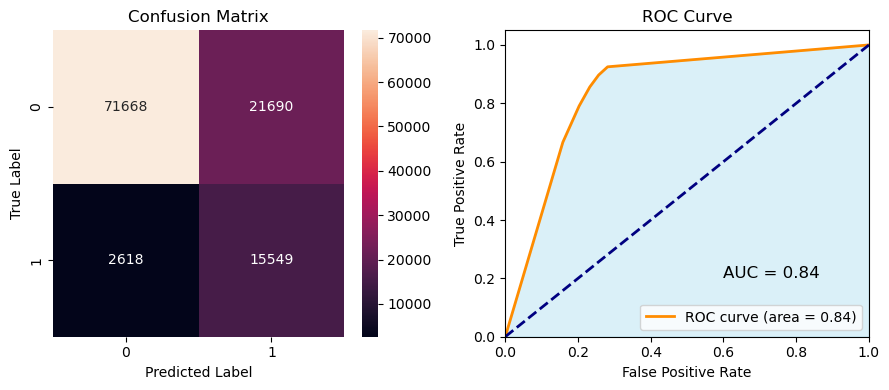

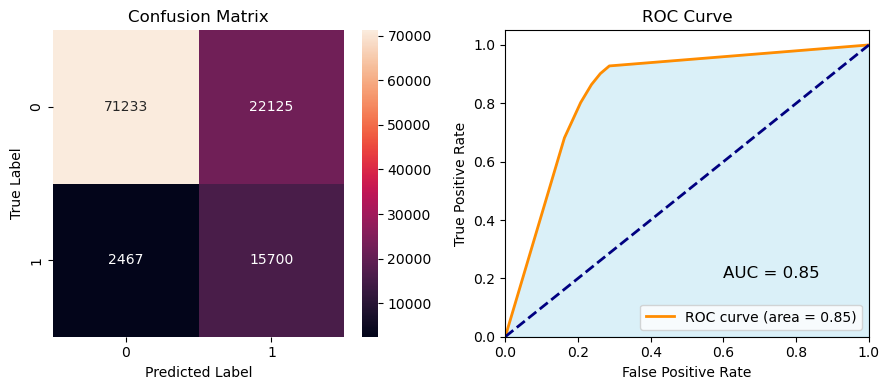

,accuracy,recall,precision,f1_score
0.660000,0.782040,0.855893,0.417546,0.561275
0.700000,0.779493,0.864204,0.415069,0.560794


In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

a = [0.66,0.7]
accuracy = []
recall = []
precision = []
f1_scores = []

for i in a:
    smoteenn = SMOTEENN(sampling_strategy=i)
    train_input_res, train_target_res = smoteenn.fit_resample(X_train, y_train)
    knn = KNeighborsClassifier(n_neighbors=5)  # Adjust the n_neighbors value
    knn.fit(train_input_res, train_target_res)

    predictions = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, predictions))
    recall.append(recall_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions))
    f1_scores.append(f1_score(y_test, predictions))

    # Calculate the predicted probabilities for positive class
    y_pred_prob = knn.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Create subplots side by side
    plt.figure(figsize=(9, 4))

    # Confusion Matrix Heatmap
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='2.0f')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title('Confusion Matrix')

    # ROC curve with shaded area under the curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Shaded area
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()


smoteenn_score_dataframe = pd.DataFrame({
    'accuracy': accuracy,
    'recall': recall,
    'precision': precision,
    'f1_score': f1_scores
}, index=a)

styled_dataframe = smoteenn_score_dataframe.style.background_gradient(cmap='Wistia')
styled_dataframe


## CONCLUSION

- Performed EDA, managed outliers, class imbalance, applied one hot encoding, and scaled features on 380K+ data points on 12      features
- Applied Decision Tree, KNN, Logistic Regression, XGBoost, and Random Forest models on imbalanced data and balanced the data    using techniques under-sampling, over-sampling, SMOTEENN, and SMOTETomek, and then retrained the models
- Achieved 0.86 recall, and 0.61 precision from the KNN by using the SMOTEENN technique yielding 0.85 AUC value with sampling    strategy 0.7 i.e. ratio of minority to majority samples is 0.7
